Necessary imports

In [1]:
import numpy as np
import os, random
from skimage import io
import matplotlib.pyplot as plt

In [2]:
folder = "data/extracted_images"

1. We have to construct random equations

In [3]:
def generate_equation(nb = 2, max_value = 100):

    assert nb > 1, "An equation has at least two terms."

    equation = []
    signs = ['+', '-', '*']

    for n in range(nb):
        gen_number = np.random.randint(max_value)
        equation.append(str(gen_number))

        gen_sign = signs[np.random.choice(len(signs))]
        equation.append(gen_sign)

    #
    equation = equation[:-1]
    equation = ''.join(equation)

    answer = eval(equation)
    answer_str = '=' + str(answer)

    return equation + answer_str

eq = generate_equation(nb = 5, max_value= 100)
print(eq)


4*76*1*50+45=15245


2. We have to assign for each digit in the equation an image coresponding to it, and generate the equation.

2.1 Define a function that selects a random file from the directory

In [4]:
def select_random_file(directory):
    n = 0
    random.seed()

    for root, dirs, files in os.walk(directory):
        for file in files:
            n += 1
            if random.uniform(0, n) < 1:
                returned_file = os.path.join(root, file)

    return returned_file

2.2 Define a function that generates the image of the equation

In [5]:
def image_of_equation_generator(folder, equation):
    equations_list = []

    for chr in equation:

        if chr == '*':
            chr = 'times'

        chr_folder = f"{folder}/{chr}"
        file = select_random_file(chr_folder)
        image = io.imread(file)

        equations_list.append(image)

    equation = np.hstack(equations_list)

    return equation

image_of_equation_generator(folder, eq)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

3. In order to be able to handle this volume of equations, we have to generate a bunch of this type of images

3.1 We create the folder which will contain those equations

In [6]:
output_folder = "equation_images"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

3.2 We generate a set of equations with two operands

98-90=8


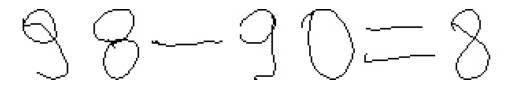

80-91=-11


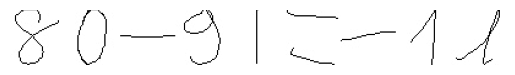

16+65=81


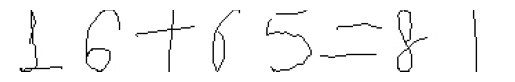

8-13=-5


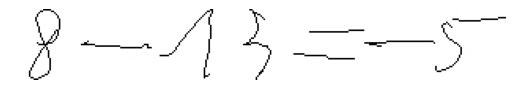

33*30=990


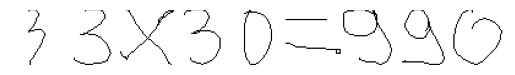

45-35=10


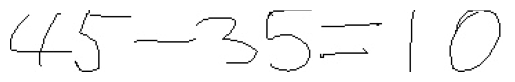

45-63=-18


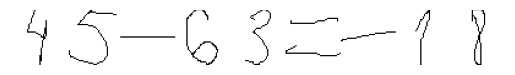

31*49=1519


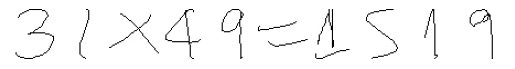

40-87=-47


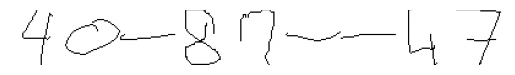

66-21=45


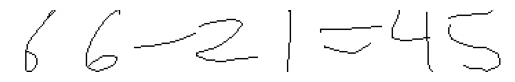

90-86=4


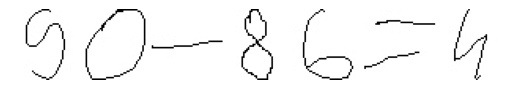

96-39=57


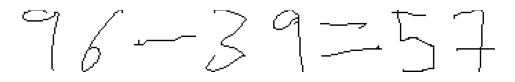

97*60=5820


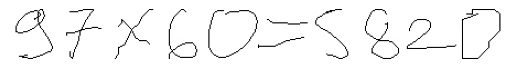

83*6=498


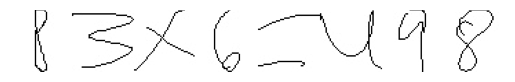

92*16=1472


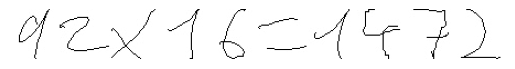

21*66=1386


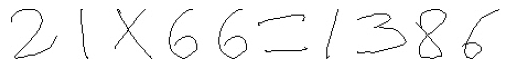

90+18=108


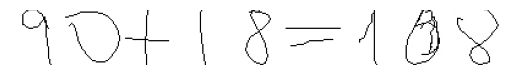

43*7=301


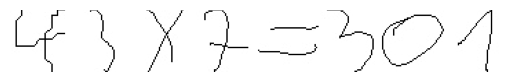

54+29=83


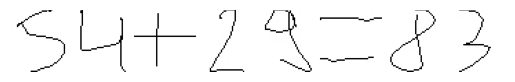

98+6=104


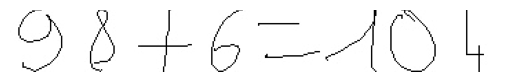

97+64=161


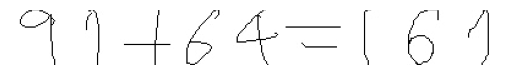

22-16=6


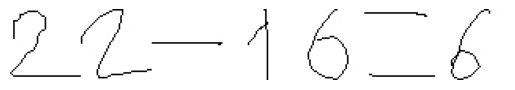

58*33=1914


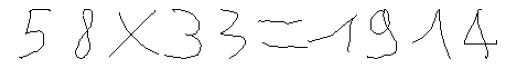

69+50=119


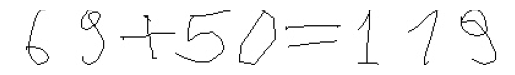

19*97=1843


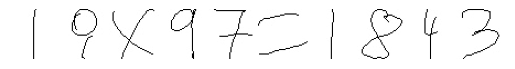

12*0=0


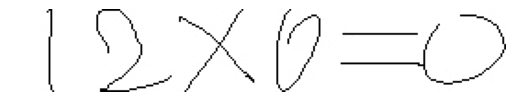

2*8=16


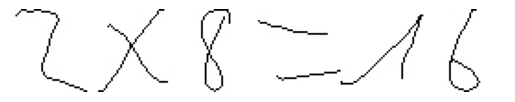

57+76=133


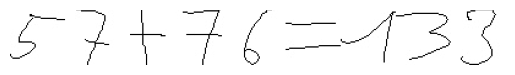

88+18=106


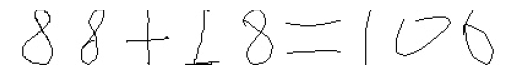

65*24=1560


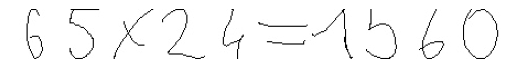

96+75=171


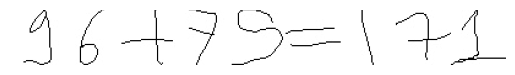

87*32=2784


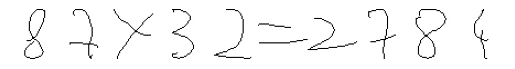

20-86=-66


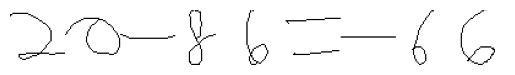

32-94=-62


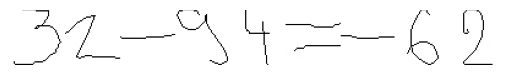

50-49=1


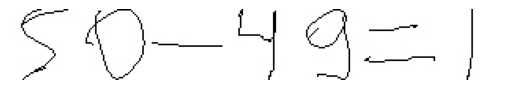

1+62=63


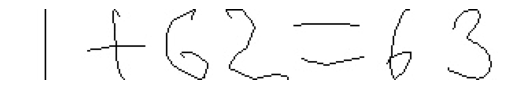

41+85=126


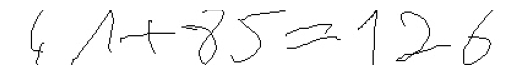

38+44=82


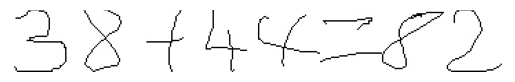

85-64=21


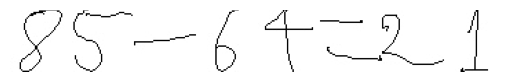

76-57=19


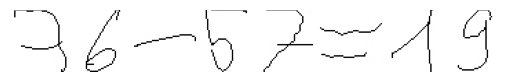

71*54=3834


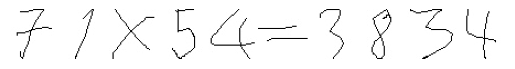

7-55=-48


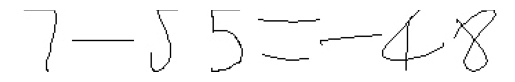

3+80=83


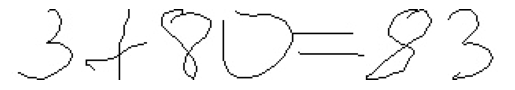

71*42=2982


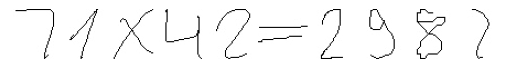

8*32=256


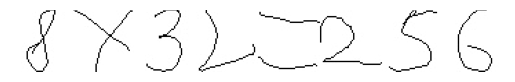

45*10=450


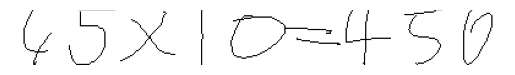

54*56=3024


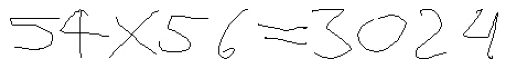

6+12=18


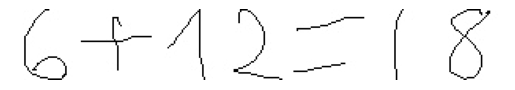

39*55=2145


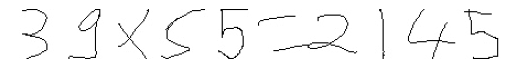

78+59=137


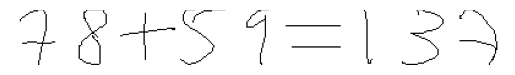

5-88=-83


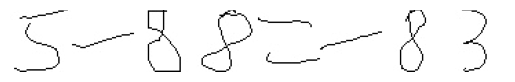

57+47=104


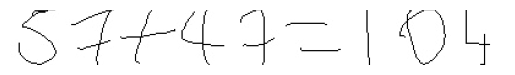

85+86=171


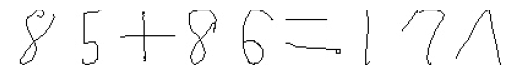

25+34=59


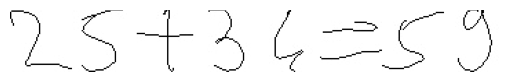

86+98=184


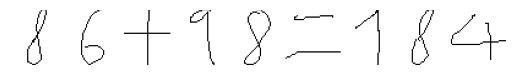

21*68=1428


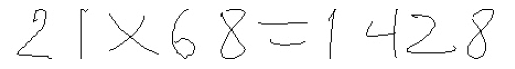

85+39=124


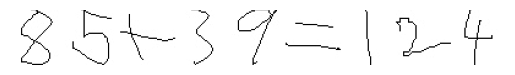

55*38=2090


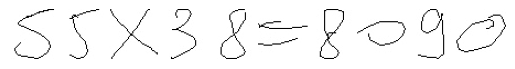

46*54=2484


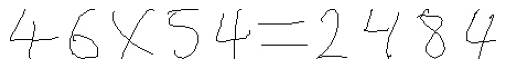

30*53=1590


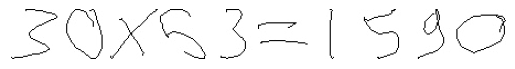

72+9=81


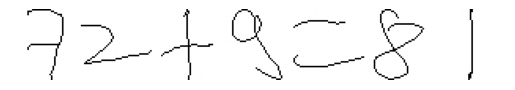

1+91=92


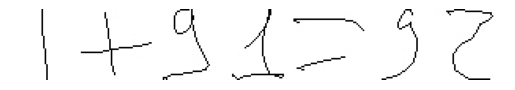

6+60=66


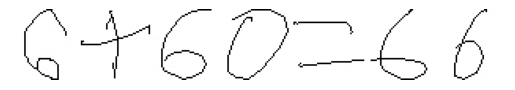

87*23=2001


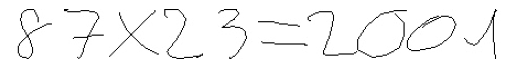

18+50=68


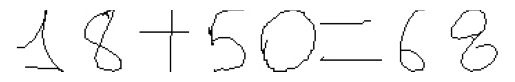

34+29=63


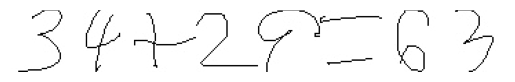

0*49=0


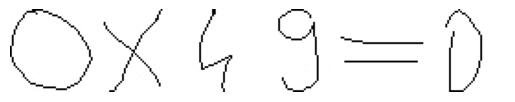

28+96=124


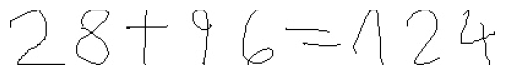

29+31=60


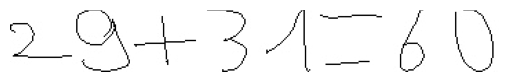

0*68=0


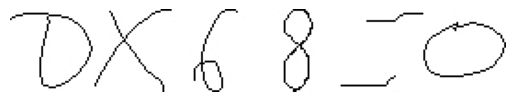

77+88=165


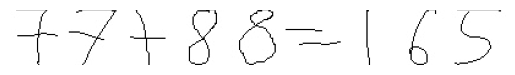

34+82=116


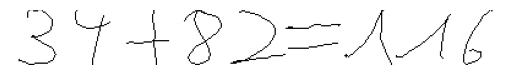

4+39=43


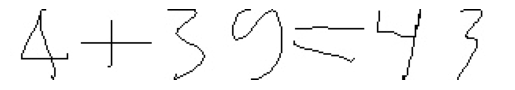

26*21=546


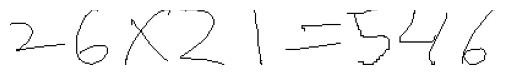

66*64=4224


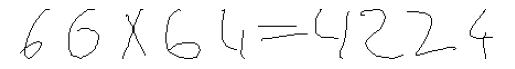

In [7]:
NB_OF_EQUATIONS = 75
NUMBER_OF_TERMS = 2
MAX_NUMBER = 100
SAVE = 1

for n in range(NB_OF_EQUATIONS):
    equation = generate_equation(NUMBER_OF_TERMS, MAX_NUMBER)
    print(equation)
    equation_list = image_of_equation_generator(folder, equation)
    filename = f"{NUMBER_OF_TERMS}numbers_{str(n).zfill(3)}.png"

    plt.imshow(equation_list, cmap='gray')
    plt.axis('off')
    plt.savefig(output_folder+ '/' + filename)
    plt.show()